Solution to Bayesian_regression2 lab
==
## Simon Rogers, Feb 2017


In [2]:
import numpy as np
import pylab as plt
%matplotlib inline

Task 1: generate some data

In [3]:
x = np.linspace(-1,1,20)[:,None] # 20 points between -1 and 1

In [11]:
X = np.hstack((np.ones_like(x),x,x**2))

In [16]:
true_w = np.array([[1.0,2.0,3.0]]).T

Plot the generated data

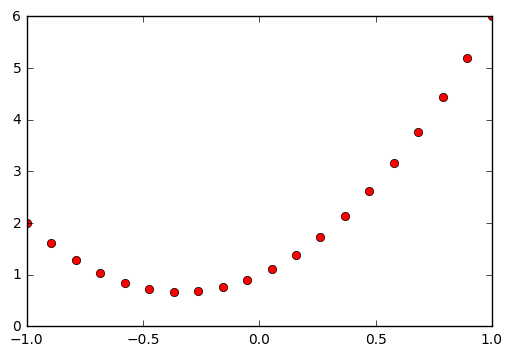

In [25]:
plt.figure()
plt.plot(x,np.dot(X,true_w),'ro')

Add some noise

In [56]:
sig_sq = 0.5**2
t = np.dot(X,true_w) + np.random.normal(scale=np.sqrt(sig_sq),size = x.shape)

Plot the noisy data

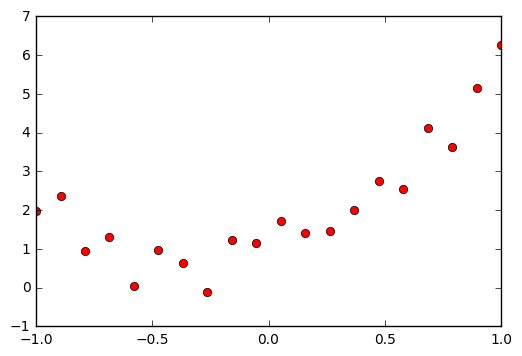

In [41]:
plt.figure()
plt.plot(x,t,'ro')

Define the prior over $w$

In [46]:
l = len(true_w)
prior_mean = np.zeros((l,1))
prior_cov = 10.0*np.eye(l)

Generate some samples from the prior and plot

In [50]:
w_samples = np.random.multivariate_normal(prior_mean.flatten(),prior_cov,10)

To plot smooth functions we need a fine-grained test set

In [62]:
testx = np.linspace(-1.5,2.0,100)[:,None]
testX = np.hstack((np.ones_like(testx),testx,testx**2))

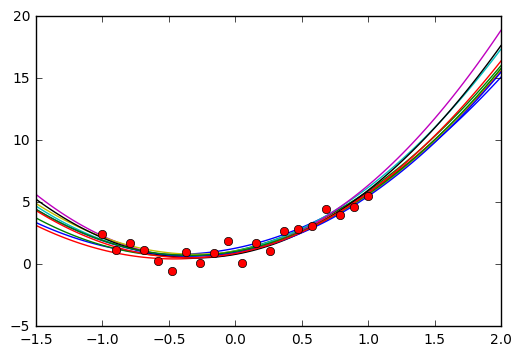

In [63]:
plt.figure()
for w_s in w_samples:
    plt.plot(testx,np.dot(testX,w_s))
plt.plot(x,t,'ro')

Bayesian inference

In [64]:
# Compute the posterior covariance matrix and mean vector

In [65]:
posterior_cov = np.linalg.inv((1.0/sig_sq)*np.dot(X.T,X) + np.linalg.inv(prior_cov))
posterior_mu = ((1.0/sig_sq))*np.dot(posterior_cov,np.dot(X.T,t))

Generate samples from posterior and plot

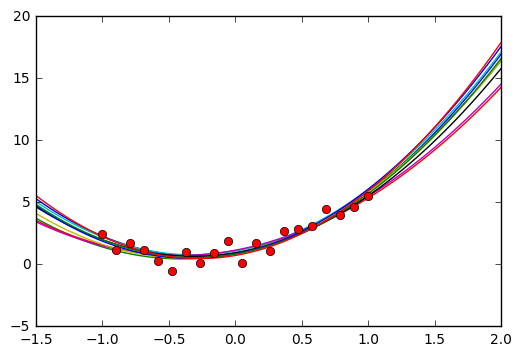

In [66]:
w_samples = np.random.multivariate_normal(posterior_mu.flatten(),posterior_cov,10)
plt.figure()
for w_s in w_samples:
    plt.plot(testx,np.dot(testX,w_s))
plt.plot(x,t,'ro')

Make predictions from sampling

In [67]:
pred_x = np.array([[1,1.5,1.5**2]]).T
n_samps = 1000
w_samples = np.random.multivariate_normal(posterior_mu.flatten(),posterior_cov,n_samps)
predictions = []
for w_s in w_samples:
    predictions.append(np.dot(w_s.T,pred_x))

(array([   2.,    4.,   37.,  121.,  215.,  263.,  211.,  108.,   33.,    6.]),
 array([  7.73770056,   8.21609835,   8.69449613,   9.17289392,
          9.6512917 ,  10.12968949,  10.60808727,  11.08648505,
         11.56488284,  12.04328062,  12.52167841]),
 <a list of 10 Patch objects>)

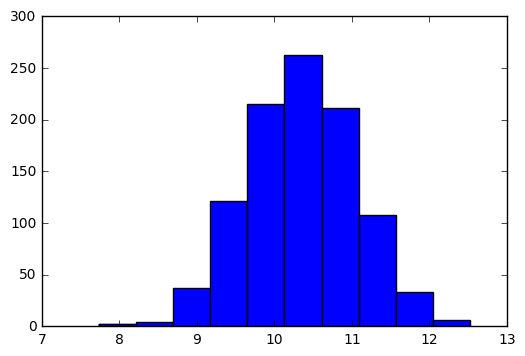

In [68]:
plt.figure()
plt.hist(np.array(predictions))

Compute the exact predictive distribution

In [71]:
pred_mu = np.dot(posterior_mu.T,pred_x)
pred_var = sig_sq + np.dot(pred_x.T,np.dot(posterior_cov,pred_x))

Plot the pdf to compare with the histogram

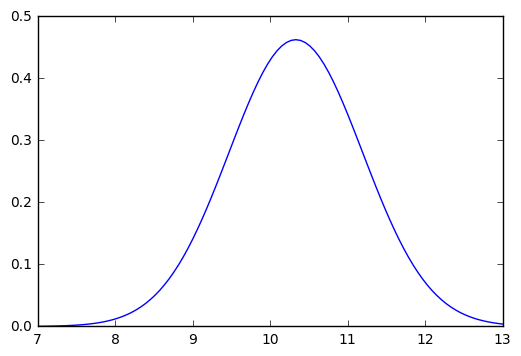

In [76]:
plt.figure()
from scipy.stats import norm
t_vals = np.linspace(7,13,100)[:,None]
plt.plot(t_vals,norm.pdf(t_vals,pred_mu,np.sqrt(pred_var)))